# Importing Libraries

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import ccf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
from statsmodels.graphics.tsaplots import acf, pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import Imputer
import copy
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
%matplotlib inline

# Reading the dataset

In [270]:
data = pd.read_excel(r'C:\Users\shrikanth\Desktop\University of Passau\SoSe2019\Data Science lab\Datasets\filtered_one.xlsx',index_col='Date', parse_dates=['Date'])
data.describe()

,Arrivals to Italy,Arrivals to Greek Islands,Departures to mainland Greece,Arrivals to fYRoM,Arrivals to Serbia,Arrivals to Croatia,Arrivals to Hungary,Arrivals to Slovenia,Arrivals to Austria
count,357.000000,357.000000,357.000000,357.000000,356.000000,357.000000,356.000000,353.000000,357.000000
mean,428.252101,1610.742297,1498.462185,1491.896359,1552.250000,1592.893557,354.623596,1343.116147,1733.781513
std,755.532544,2222.089910,2186.910783,2401.829088,2282.469038,2471.374758,1291.162568,2350.597010,2429.884425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,0.000000,65.000000,37.000000,0.000000,74.000000,0.000000,27.000000,0.000000,133.000000
50%,53.000000,186.000000,99.000000,0.000000,300.000000,0.000000,47.500000,0.000000,196.000000
75%,550.000000,2808.000000,2417.000000,2349.000000,2468.500000,2732.000000,144.000000,2118.000000,2764.000000
max,5504.000000,10006.000000,12116.000000,11572.000000,10150.000000,11570.000000,8702.000000,12616.000000,10784.000000


# Dataset Visualization

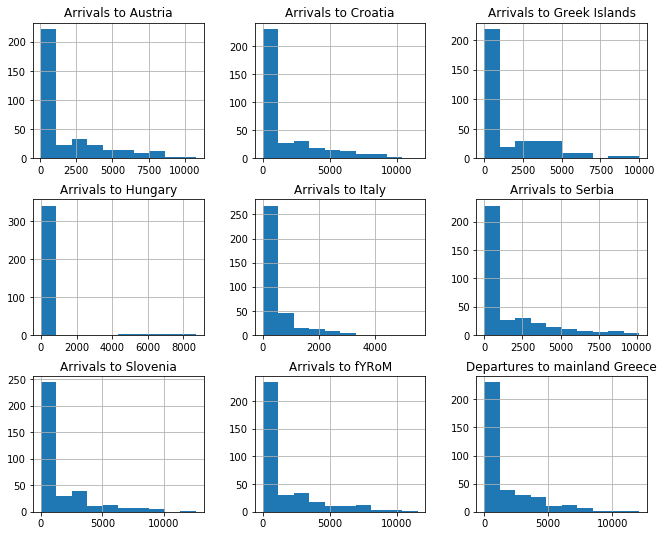

In [210]:
from matplotlib import pyplot
rcParams['figure.figsize'] = 11, 9
Interpolation_data.hist()
pyplot.show()

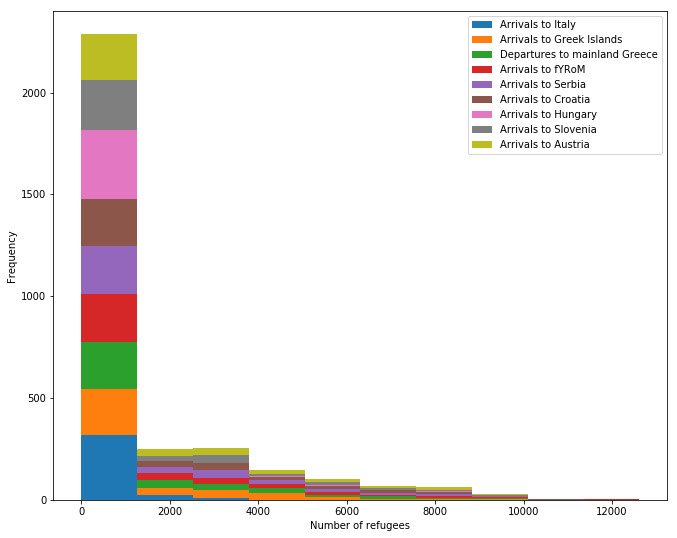

In [211]:
data.plot.hist(stacked=True)
plt.xlabel('Number of refugees')
plt.show()

# Montly Time Series Plot

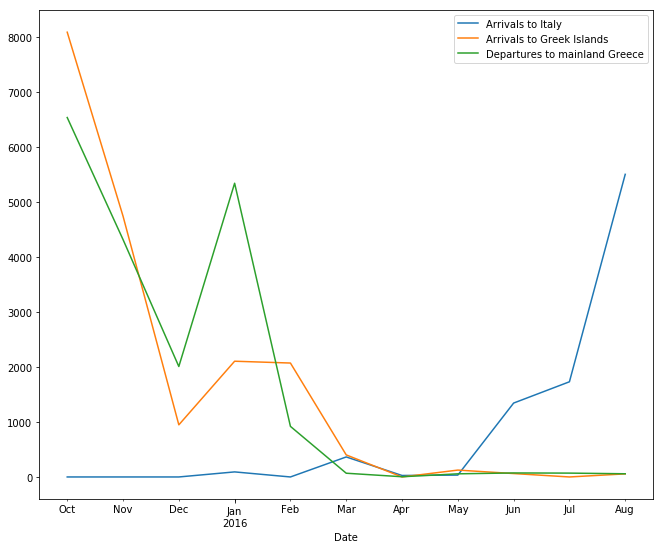

In [212]:
data['Arrivals to Italy'].asfreq('M').plot()
data['Arrivals to Greek Islands'].asfreq('M').plot()
data['Departures to mainland Greece'].asfreq('M').plot()
plt.legend(['Arrivals to Italy','Arrivals to Greek Islands', 'Departures to mainland Greece'])
plt.show()

# Time Series Decomposition

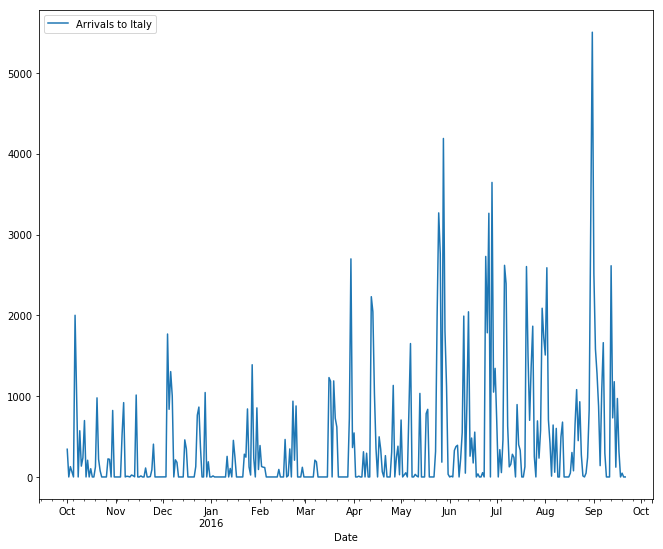

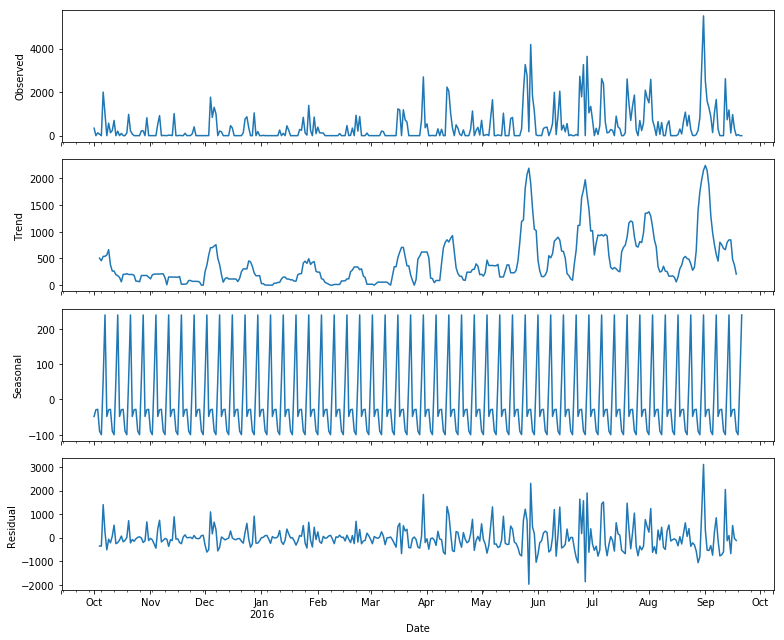

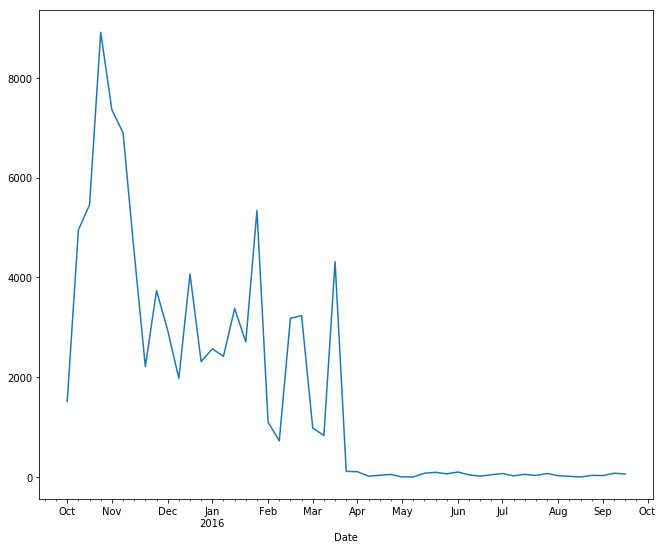

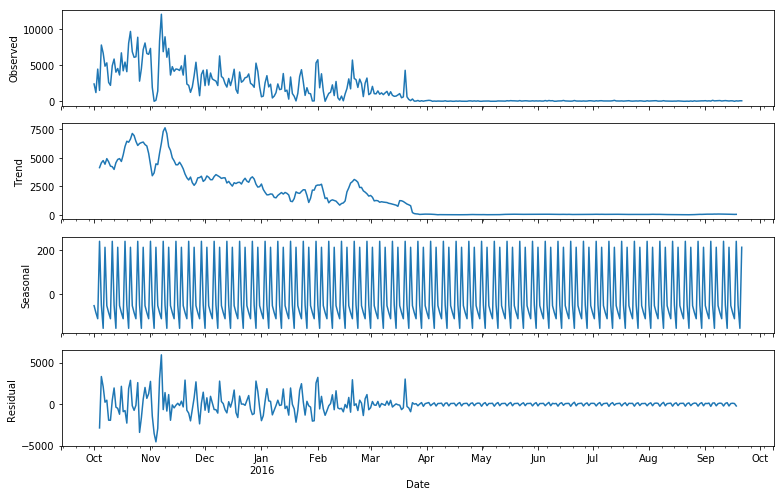

In [213]:
#References - https://otexts.com/fpp2/components.html, https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
#http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

data_Italy = data[['Arrivals to Italy']]
data_Italy.plot()
rcParams['figure.figsize'] = 11, 9
decomposed_Italy = sm.tsa.seasonal_decompose(data['Arrivals to Italy'], model = 'additive', freq=7) 
#Multiplicative model cannot be used because of presence of 0 and -ve values
figure = decomposed_Italy.plot()
plt.show()
#-----------------------------------------------------------------------------------------------------------------------------------#
data_MG = data['Departures to mainland Greece']
data_MG.asfreq('W').plot()
rcParams['figure.figsize'] = 11, 7
decomposed_MG = sm.tsa.seasonal_decompose(data['Departures to mainland Greece'], model='additive', freq=7) 
figure = decomposed_MG.plot()
plt.show()

# Interpolation of missing values

In [214]:
def linear_interpolation(country):
    iterpolated = country.interpolate(method='linear', limit_direction='forward', axis=0)
    return iterpolated

linear_interpolation(data['Arrivals to Italy'])

Date
2015-10-01     343
2015-10-02       0
2015-10-03     128
2015-10-04      62
2015-10-05       0
2015-10-06    2001
2015-10-07    1010
2015-10-08       0
2015-10-09     572
2015-10-10     134
2015-10-11     237
2015-10-12     698
2015-10-13       0
2015-10-14     207
2015-10-15       0
2015-10-16     102
2015-10-17       0
2015-10-18       0
2015-10-19     125
2015-10-20     979
2015-10-21     219
2015-10-22      76
2015-10-23       0
2015-10-24       0
2015-10-25       0
2015-10-26       0
2015-10-27     224
2015-10-28     218
2015-10-29       0
2015-10-30     823
              ... 
2016-08-23     931
2016-08-24     273
2016-08-25      13
2016-08-26       0
2016-08-27      47
2016-08-28     240
2016-08-29     833
2016-08-30    3102
2016-08-31    5504
2016-09-01    2517
2016-09-02    1583
2016-09-03    1280
2016-09-04     875
2016-09-05     140
2016-09-06    1060
2016-09-07    1662
2016-09-08     293
2016-09-09       0
2016-09-10       0
2016-09-11       0
2016-09-12    2614
2016-09

# IDW Interpolation

In [215]:
#Reference - http://www.gitta.info/ContiSpatVar/en/html/Interpolatio_learningObject2.xhtml

Interpolation_data = copy.deepcopy(data)

def IDW_Interpolation_k_factor(country,factor):
    dates = country.index.to_series()
    arrivals = country.iloc[:]
    location = []
    loc = []

    ind = pd.Index(arrivals)
    
    cnt = 0

    boolean_value = arrivals.isna()
    
    for i in boolean_value:
        if i==True: cnt+=1
        
    if cnt>0:
            location = np.append(loc, ind.get_loc(np.nan))

            weights = []
            indexes = list(range(len(dates)))

            for k in range (0, len(location)):
                numerator = []
                shift_index = indexes[:] - (location[k])

                for i in range(0,len(shift_index)-1):
                    if shift_index[i]<0:
                        shift_index[i]=shift_index[i]*(-1)


                for i in range(0,len(shift_index)):
                    if shift_index[i]!=0:
                        shift_index[i] = 1 / (shift_index[i]**factor)


                for i in range(0,len(shift_index)):
                    if shift_index[i]!=0:
                        numerator = np.append(numerator, (ind[i] * shift_index[i]))
                    else:
                         numerator = np.append(numerator,0)

                denominator = shift_index
                weights.append(np.nansum(numerator) // np.nansum(denominator))

   
            
            count = 0
            for item in location:
                if(count < len(weights)):
                    country.iloc[int(item)] = weights[count]
                    count += 1

            #print(country)
            return country
    
for item in data.columns:
    print (IDW_Interpolation_k_factor(Interpolation_data[item],1))

None
None
None
None


C:\Users\shrikanth\Anaconda3\anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Date
2015-10-01     5900.0
2015-10-02     3700.0
2015-10-03     3700.0
2015-10-04     4250.0
2015-10-05     3250.0
2015-10-06     2650.0
2015-10-07     4350.0
2015-10-08     4650.0
2015-10-09     6550.0
2015-10-10     4850.0
2015-10-11     5950.0
2015-10-12     6556.0
2015-10-13     5330.0
2015-10-14     5280.0
2015-10-15     5850.0
2015-10-16     5700.0
2015-10-17     5250.0
2015-10-18    10150.0
2015-10-19     4850.0
2015-10-20     4650.0
2015-10-21     6850.0
2015-10-22     8750.0
2015-10-23     8750.0
2015-10-24     9000.0
2015-10-25     8700.0
2015-10-26     5100.0
2015-10-27     6257.0
2015-10-28     5415.0
2015-10-29     6700.0
2015-10-30     7138.0
               ...   
2016-08-23      200.0
2016-08-24      200.0
2016-08-25      200.0
2016-08-26      200.0
2016-08-27      200.0
2016-08-28      200.0
2016-08-29      200.0
2016-08-30      200.0
2016-08-31      200.0
2016-09-01      200.0
2016-09-02      200.0
2016-09-03      200.0
2016-09-04      200.0
2016-09-05      200.0
2016-

# Calculating error metrics for various interpolation techniques

Check for NaN values in the series

In [216]:
def nan_check(Arrivals_to):
    print('Number of NaN values', Arrivals_to.isna().sum())

nan_check(Interpolation_data['Arrivals to Slovenia'])


Number of NaN values 0


Comparison between linear interpolation and IDW interpolation

In [217]:
#Creating empty lists for further processing

rmse_data = copy.deepcopy(Interpolation_data)
original_data = copy.deepcopy(Interpolation_data)
IDW_interpolated = copy.deepcopy(Interpolation_data)
mse_IDW = []
rmse_IDW = []
mse_linear = []
rmse_linear = []

#Introducing NaN values maually in the series to check for the MSE and RMSE errors of various interpolation techniques.

for item in data.columns:
    rmse_data[item]['2015-10-10'] = np.nan
    rmse_data[item]['2016-09-12'] = np.nan
rmse_data_2 = copy.deepcopy(rmse_data)

#IDW Interpolation with K-factor = 1
for item in rmse_data.columns:
    IDW_interpolated[item] = IDW_Interpolation_k_factor(rmse_data[item],1)

#Linear Interpolation
linear_interpolated_data = linear_interpolation(rmse_data_2)

#Calculation of MSE and RMSE for IDW and Linear Interpolation techniques
for item in data.columns:
    mse_IDW.append(mean_squared_error(original_data[item], IDW_interpolated[item])) 
    mse_linear.append(mean_squared_error(original_data[item], linear_interpolated_data[item]))
    
for item in mse_IDW:
    rmse_IDW.append(sqrt(item))
    
for item in mse_linear:
    rmse_linear.append(sqrt(item))

formatted_list_IDW = [ '%.2f' % elem for elem in rmse_IDW  ]
formatted_list_linear = [ '%.2f' % elem for elem in rmse_linear  ]

print(formatted_list_IDW)
print(formatted_list_linear)
    

C:\Users\shrikanth\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shrikanth\Anaconda3\anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\shrikanth\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


['109.25', '32.24', '98.82', '10.49', '10.75', '135.62', '216.53', '16.91', '22.60']
['119.86', '43.68', '83.44', '45.28', '74.10', '49.19', '18.58', '43.90', '136.05']


# Dickey Fuller test

$H_0 : \beta =0 $ : Random Walk
<br />$H_1 : \beta < 0 $ : Not a Random Walk

In [218]:
def dickey_fuller(column):
    result = adfuller(column, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

dickey_fuller(Interpolation_data['Arrivals to Slovenia'])

ADF Statistic: -1.464423
p-value: 0.551032
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


Running the example prints the test statistic value of -1.74. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).
 
As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -1 is greater than the value of -2.571 at 10%.

This suggests that we cannot reject the null hypothesis. 

# Rolling mean and rolling standard deviation

7401.266666666666
4328.753591365753


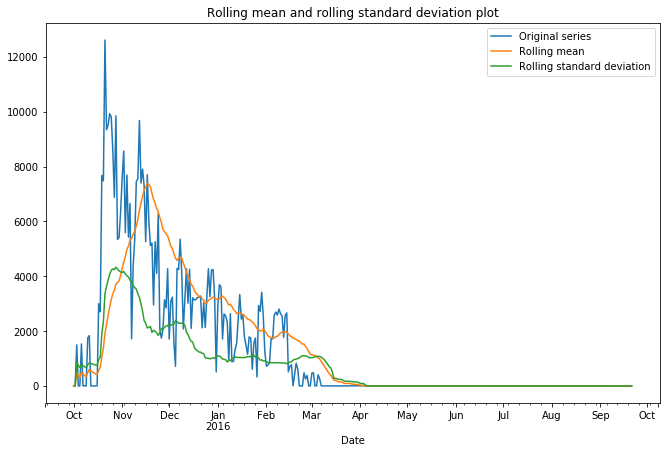

In [219]:
def station_test(Arrivals_to):
    rolling_mean = Arrivals_to.rolling('30D').mean()
    rolling_std = Arrivals_to.rolling('30D').std()
    Arrivals_to.plot()
    rolling_mean.plot()
    rolling_std.plot()
    plt.legend(['Original series', 'Rolling mean', 'Rolling standard deviation'])
    plt.title('Rolling mean and rolling standard deviation plot')
    print(rolling_mean.max())
    print(rolling_std.max())
    #plt.show()

station_test(Interpolation_data['Arrivals to Slovenia'])



One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

Since the variation in standard deviation and mean is decreasing with time the series is not stationary. Had it been a stationary time series the rolling mean and standard deviation would have been constant irrespective of time.

# Decomposition of time series into trend and seasonal components

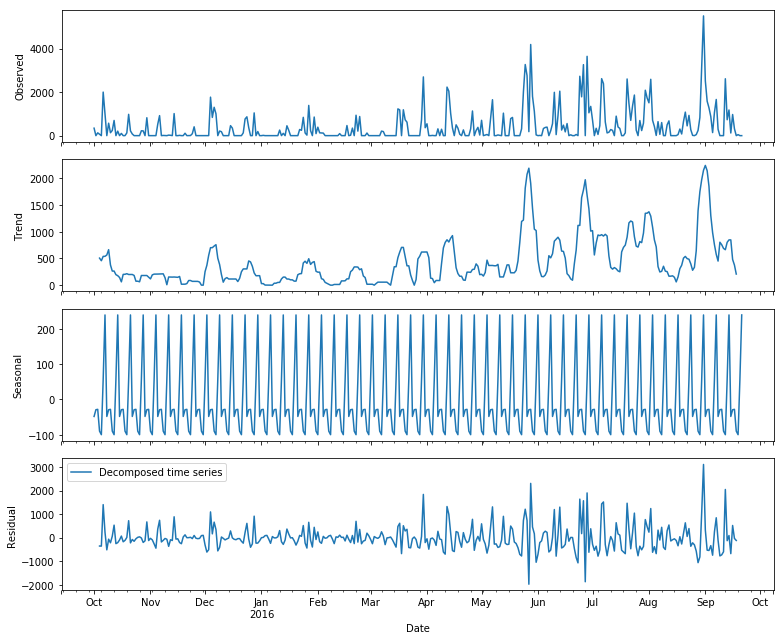

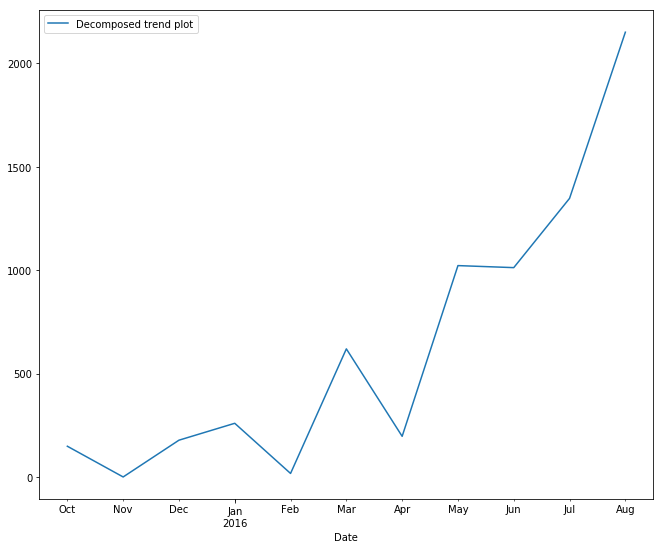

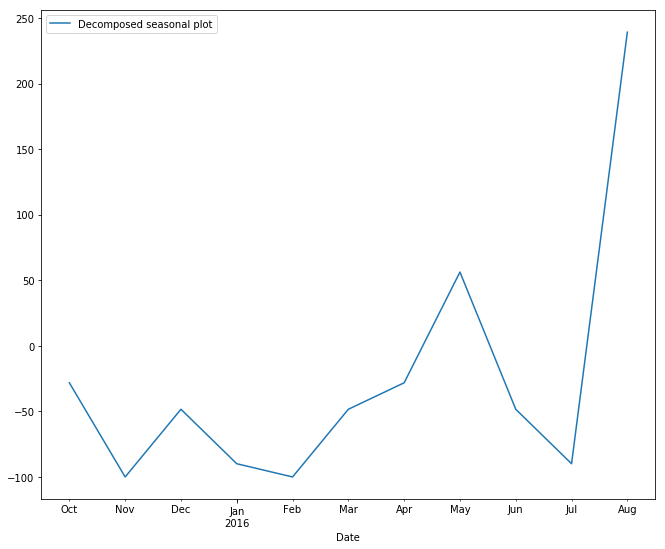

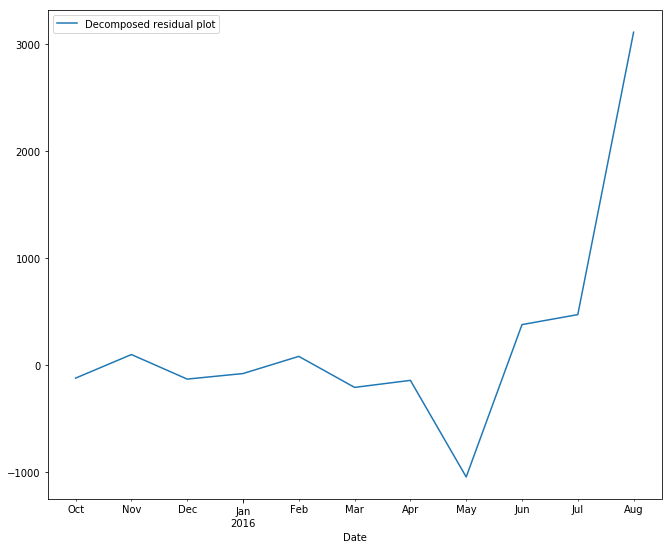

In [220]:
def season_decompose(series):
    rcParams['figure.figsize'] = 11, 9
    result = seasonal_decompose(series)
    result.plot()
    plt.legend(['Decomposed time series'])
    plt.show()
    result.trend.asfreq('M').plot()
    plt.legend(['Decomposed trend plot'])
    plt.show()
    result.seasonal.asfreq('M').plot()
    plt.legend(['Decomposed seasonal plot'])
    plt.show()
    result.resid.asfreq('M').plot()
    plt.legend(['Decomposed residual plot'])
    plt.show()

season_decompose(Interpolation_data['Arrivals to Italy'])   

# Making the time series stationary - First order differencing 

Number of NaN values 0
ADF Statistic: -9.858148
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
331.6
1465.648804980317


Date
2015-10-02    -343.0
2015-10-03     128.0
2015-10-04     -66.0
2015-10-05     -62.0
2015-10-06    2001.0
2015-10-07    -991.0
2015-10-08   -1010.0
2015-10-09     572.0
2015-10-10    -438.0
2015-10-11     103.0
2015-10-12     461.0
2015-10-13    -698.0
2015-10-14     207.0
2015-10-15    -207.0
2015-10-16     102.0
2015-10-17    -102.0
2015-10-18       0.0
2015-10-19     125.0
2015-10-20     854.0
2015-10-21    -760.0
2015-10-22    -143.0
2015-10-23     -76.0
2015-10-24       0.0
2015-10-25       0.0
2015-10-26       0.0
2015-10-27     224.0
2015-10-28      -6.0
2015-10-29    -218.0
2015-10-30     823.0
2015-10-31    -823.0
               ...  
2016-08-23     482.0
2016-08-24    -658.0
2016-08-25    -260.0
2016-08-26     -13.0
2016-08-27      47.0
2016-08-28     193.0
2016-08-29     593.0
2016-08-30    2269.0
2016-08-31    2402.0
2016-09-01   -2987.0
2016-09-02    -934.0
2016-09-03    -303.0
2016-09-04    -405.0
2016-09-05    -735.0
2016-09-06     920.0
2016-09-07     602.0
2016-09-

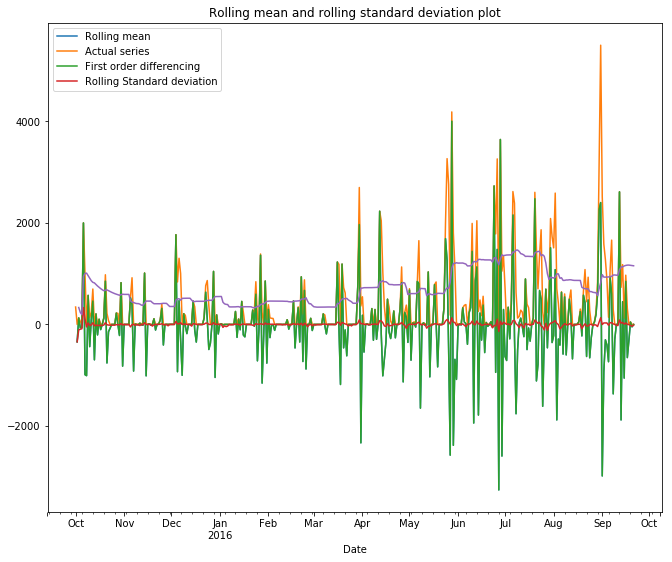

In [221]:
def diff_order_1(country):
    rcParams['figure.figsize'] = 11, 9
    original_series_country = country
    shifted_country = country.shift()
    first_order_diff_country = original_series_country - shifted_country
    first_order_diff_country.dropna(inplace=True)
    nan_check(first_order_diff_country)
    #print(first_order_diff_country)
    first_order_diff_country.plot()
    original_series_country.plot()
    dickey_fuller(first_order_diff_country)
    station_test(first_order_diff_country)
    plt.legend(['Rolling mean', 'Actual series', 'First order differencing', 'Rolling Standard deviation'])
    return first_order_diff_country

diff_order_1(Interpolation_data['Arrivals to Italy'])

# Second order differencing

Number of NaN values 0
ADF Statistic: -6.352468
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
748.5
2461.2554884266574
Number of NaN values 0
ADF Statistic: -6.342542
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
748.5
2461.2554884266574
ADF Statistic: -8.449939
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
1497.0
4147.890346066119
Date
2015-10-03    1497.0
2015-10-04   -2994.0
2015-10-05    1497.0
2015-10-06    1529.0
2015-10-07   -3058.0
2015-10-08    1535.0
2015-10-09     -12.0
2015-10-10    1753.0
2015-10-11   -1659.0
2015-10-12   -1923.0
2015-10-13    1835.0
2015-10-14       0.0
2015-10-15       0.0
2015-10-16       0.0
2015-10-17    3000.0
2015-10-18   -3300.0
2015-10-19    5277.0
2015-10-20   -5176.0
2015-10-21    5337.0
2015-10-22   -8415.0
2015-10-23    3438.0
2015-10-24     264.0
2015-10-25    -532.0
2015-10-26   -1086.0
2015-10-27    -555.0
2015-10-28    4719.0
2015-10-29   -7478.0
2015-10-30    45

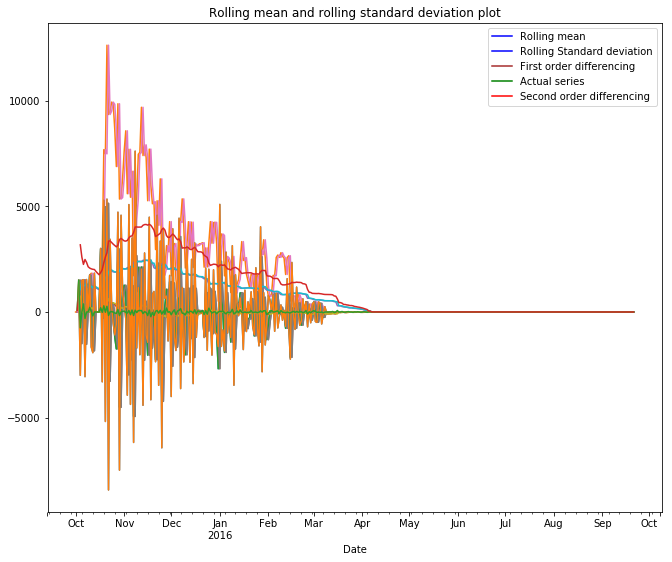

In [222]:
actual_series = Interpolation_data['Arrivals to Slovenia']
differenced_1  = diff_order_1(Interpolation_data['Arrivals to Slovenia'])
shifted_1 = Interpolation_data['Arrivals to Slovenia'].shift(1)
shifted_1.dropna(inplace=True)
differenced_2 = diff_order_1(shifted_1)
#nan_check(differenced_2)

def diff_order_2 (diff_1, diff_2):
    result_order_2 = diff_1-diff_2
    result_order_2.dropna(inplace = True)
    result_order_2.plot()
    #original.plot()
    dickey_fuller(result_order_2)
    station_test(result_order_2)
    plt.legend(['Rolling mean', 'Rolling Standard deviation', 'First order differencing', 'Actual series', 'Second order differencing'])
   # plt.legend(['Rolling mean', 'Actual series', 'First order differencing', 'Rolling Standard deviation', 'Second order differencing'])
    ax = plt.gca()
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('blue')
    leg.legendHandles[1].set_color('blue')
    leg.legendHandles[2].set_color('brown')
    leg.legendHandles[3].set_color('green')
    leg.legendHandles[4].set_color('red')
    return result_order_2
    

detrended_2 = diff_order_2(differenced_1, differenced_2 )
print(detrended_2)

# Seasonality component determination

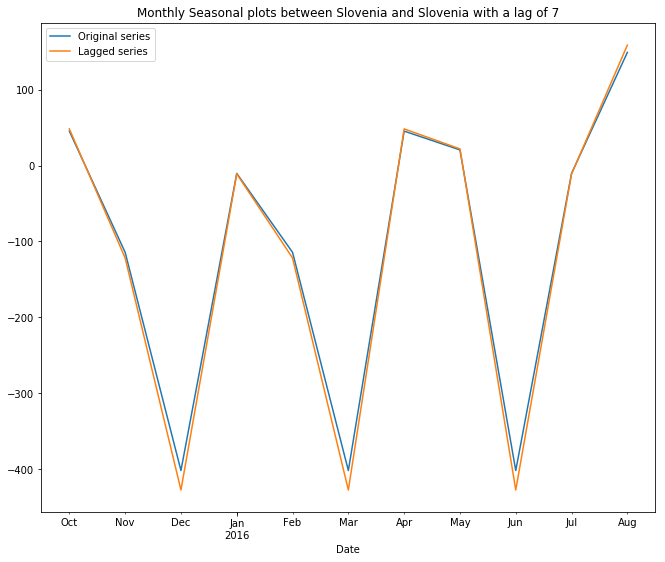

In [223]:
def check_period(country):
    country.dropna(inplace=True)
    lagged_country = country.shift(21)
    lagged_country.dropna(inplace=True)
    
    decomposed_country = sm.tsa.seasonal_decompose(country)
    decomposed_lagged = sm.tsa.seasonal_decompose(lagged_country)
    
    decomposed_country.seasonal.asfreq('M').plot()
    decomposed_lagged.seasonal.asfreq('M').plot()
    plt.title('Monthly Seasonal plots between Slovenia and Slovenia with a lag of 7')
    plt.legend(['Original series','Lagged series'])
   # plt.show()

check_period(detrended_2)

The plotted graph shows seasonality in every seven days, hence we can remove the seasonal pattern in a similar way the trend was eliminated. The forthcoming section will explain the process.

# Elimination of Seasonal component from the time series

ADF Statistic: -9.545159
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
795.5
5458.202886850487
Date
2015-10-10     256.0
2015-10-11    1335.0
2015-10-12   -3420.0
2015-10-13     306.0
2015-10-14    3058.0
2015-10-15   -1535.0
2015-10-16      12.0
2015-10-17    1247.0
2015-10-18   -1641.0
2015-10-19    7200.0
2015-10-20   -7011.0
2015-10-21    5337.0
2015-10-22   -8415.0
2015-10-23    3438.0
2015-10-24   -2736.0
2015-10-25    2768.0
2015-10-26   -6363.0
2015-10-27    4621.0
2015-10-28    -618.0
2015-10-29     937.0
2015-10-30    1137.0
2015-10-31     603.0
2015-11-01     864.0
2015-11-02     776.0
2015-11-03   -3379.0
2015-11-04     360.0
2015-11-05    3109.0
2015-11-06   -1079.0
2015-11-07   -7035.0
2015-11-08    7272.0
               ...  
2016-08-23       0.0
2016-08-24       0.0
2016-08-25       0.0
2016-08-26       0.0
2016-08-27       0.0
2016-08-28       0.0
2016-08-29       0.0
2016-08-30       0.0
2016-08-31       0.0
2016-09-01       0.0
2016-09-02   

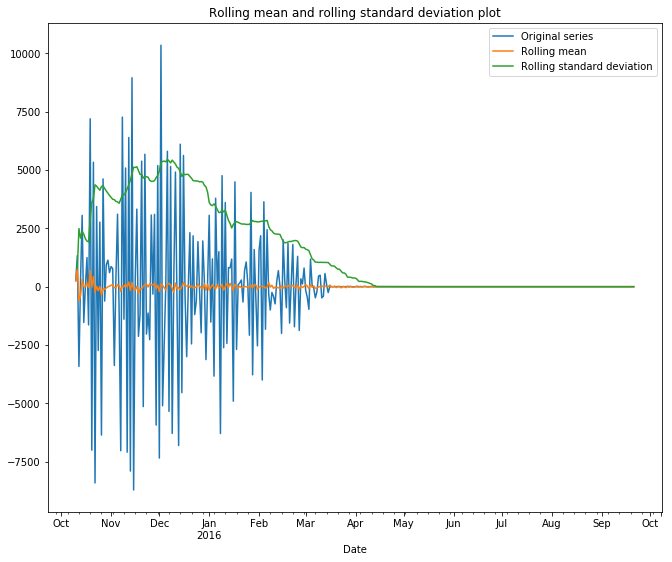

In [230]:
def de_season(country, original, lag):

    country_lag = country.shift(lag)
    country_diff = country - country_lag
    country_diff.dropna(inplace=True)
    dickey_fuller(country_diff)
    station_test(country_diff)
    #compare(original, country_diff) 
    return country_diff

de_season_1 = de_season(detrended_2, Interpolation_data['Arrivals to Slovenia'], 7)

As observed from the results the p - Value is zero which is less than 5% and also the rolling mean has almost become a stationary line, hence we can stop here with first order de-seasoning. But one can also employ second order de-seasoning which might result in contant rolling standard deviation. 

# Auto correlation and Partial auto correlation.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

In [225]:
lag_acf = acf(de_season_1, nlags=20)
lag_pacf = pacf(de_season_1, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

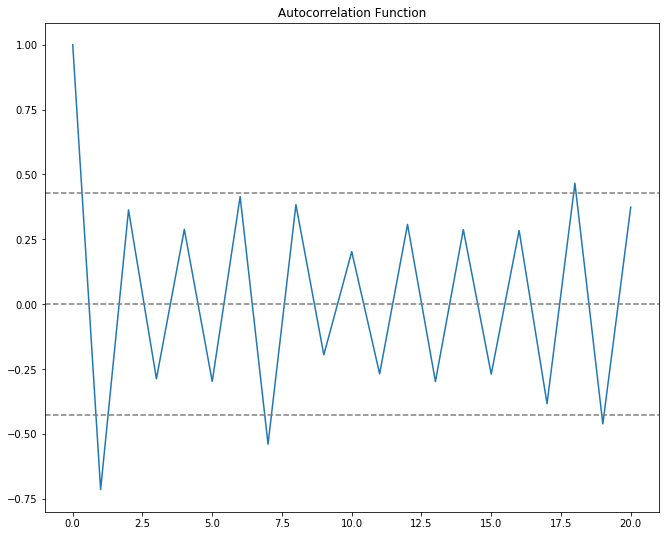

In [226]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

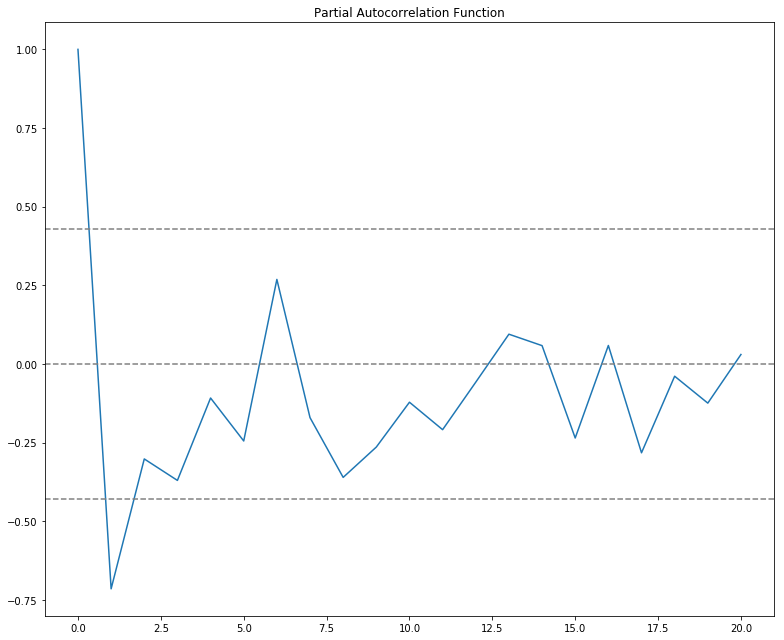

In [227]:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# Cross corelation between different countries

In [229]:
countries = ['Arrivals to Italy', 'Arrivals to Greek Islands', 'Departures to mainland Greece', 'Arrivals to fYRoM', 'Arrivals to Serbia', 'Arrivals to Croatia', 'Arrivals to Hungary']
df = pd.DataFrame(columns = countries, index = countries)
for item in countries:
    for item2 in countries:
        if (item != item2):
            correlation = Interpolation_data[item][:68].corr(Interpolation_data[item2][:68])
            #print (item, item2, correlation)
            df[item][item2] = correlation
            
df.fillna(1)



,Arrivals to Italy,Arrivals to Greek Islands,Departures to mainland Greece,Arrivals to fYRoM,Arrivals to Serbia,Arrivals to Croatia,Arrivals to Hungary
Arrivals to Italy,1.000000,0.100851,0.054453,-0.214827,-0.285280,-0.164656,0.148275
Arrivals to Greek Islands,0.100851,1.000000,0.484729,0.254353,0.266691,0.236453,0.065702
Departures to mainland Greece,0.054453,0.484729,1.000000,0.444472,0.393103,0.184778,-0.058330
Arrivals to fYRoM,-0.214827,0.254353,0.444472,1.000000,0.877923,0.559777,-0.022407
Arrivals to Serbia,-0.285280,0.266691,0.393103,0.877923,1.000000,0.634506,-0.077141
Arrivals to Croatia,-0.164656,0.236453,0.184778,0.559777,0.634506,1.000000,0.093610
Arrivals to Hungary,0.148275,0.065702,-0.058330,-0.022407,-0.077141,0.093610,1.000000


The cross corelation determines the similarity of the time series between different countries. If any strong corelation is found then the time series of one country can be used to forecast the time series of other countries. In addition to that various inferences can be drawn which might be useful to incorporate in designing the forecastig model.
From the results above we can see that 'Arrivals to Serbia' and 'Arrivals to fYRoM' have close corelation among them.

# De-trending and De-seasoning

Number of NaN values 0
ADF Statistic: -9.858148
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
331.6
1465.648804980317
ADF Statistic: -8.953403
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
915.0
2001.7615449295208
Number of NaN values 0
ADF Statistic: -9.330292
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
1733.0
1847.2063681859336
ADF Statistic: -8.858927
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
372.6666666666667
2595.4722755855696
Number of NaN values 0
ADF Statistic: -7.782838
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
1356.0
4222.021869515442
ADF Statistic: -9.283424
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
310.26666666666665
4915.3622789508945
Number of NaN values 0
ADF Statistic: -11.489878
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
1483.0
2609.68492483222
ADF Statistic: -9.185745
p-va

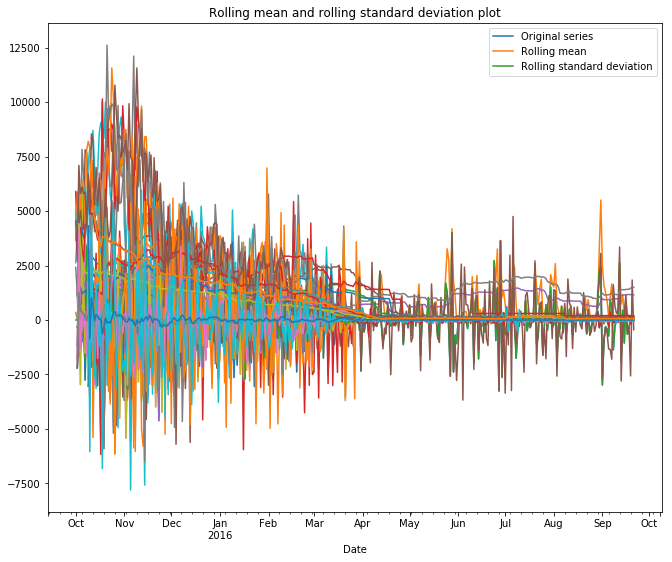

In [233]:
differenced_1 = copy.deepcopy(Interpolation_data)

for item in Interpolation_data.columns:
        differenced_1[item] = de_season(diff_order_1(Interpolation_data[item]), Interpolation_data[item], 7)


# Exporting to CSV file

In [235]:
differenced_1.to_csv('differenced approach 1_v2.csv')

This marks the end of Pre-processing phase the above exported csv file will be used for the forecasting model.